In [1]:
from qutip import qeye, sigmax, sigmay, sigmaz, tensor, basis, mesolve
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [73]:
def generate_operators(N):
    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    p = (si - sz) / 2.0

    sx_list = []
    sy_list = []
    sz_list = []
    p_list = []

    for n in range(N):
        op_list = [si] * N

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

        op_list[n] = p
        p_list.append(tensor(op_list))

    return sx_list, sy_list, sz_list, p_list

In [74]:
def create_PXP_Hamiltonian(N, W, Bound, Omega):
    sx_list, sy_list, sz_list, p_list = generate_operators(N)

    H = 0
    for n in range(N - 2):
        H += Omega * p_list[n] * sx_list[n + 1] * p_list[n + 2]  # PXP model operators, scaled by Omega

    # Boundary conditions
    if Bound == 'pbc' or Bound == 'PBC':
        H += Omega * (p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1])  # PBC

    if Bound == 'obc' or Bound == 'OBC':
        H += Omega * (sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1])  # OBC

    # Random uniform distribution of perturbation strength values
    hw = np.random.uniform(-W / 2, W / 2, (3 * N))
    m = 0
    for n in range(N):
        H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions with zeeman-like field
        m += 3
    
    return H

Checking for the interplay of $\Omega$ and $hw$ on the fidelity revivals of various states

In [7]:
N = 14

In [13]:
# Define the translated Z2 state with excitation on every other site, but shifted
def translated_Z2_state(N):
    return tensor([basis(2, (i + 1) % 2) for i in range(N)])

# Define the initial ground state
ground_state = tensor([basis(2, 0) for i in range(N)])

# Define the initial Z3 state with pattern 001
Z3_state = tensor([basis(2, (i % 3 == 2)) for i in range(N)])

# Define the initial Z3 state with pattern 001
Z4_state = tensor([basis(2, (i % 4 == 3)) for i in range(N)])

# Define the initial Z2 state with excitation on every other site
def Z2_state(N):
    return tensor([basis(2, i % 2) for i in range(N)])

# Define the translated Z2 state with excitation on every other site, but shifted
def translated_Z2_state(N):
    return tensor([basis(2, (i + 1) % 2) for i in range(N)])

# Create the superposition of Z2 and translated Z2 states
def superposition_Z2_translated_Z2(N):
    Z2 = Z2_state(N)
    translated_Z2 = translated_Z2_state(N)
    superposition = (Z2 + translated_Z2).unit() / np.sqrt(2)
    return superposition

In [75]:
# Parameters
N = 16 # Number of sites
Omega = 1.0
W = 0.0
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)

H_PXP_perturb = create_PXP_Hamiltonian(N, W, Bound, Omega)

# Time evolution parameters
tlist = np.linspace(0, 40, 500)  # Time array, modify as needed

# Evolve the system
result = mesolve(H_PXP_perturb,Z2_state(N), tlist, [])

# Calculate fidelity with the initial Z2 state
fidelitiespureZ2 = [np.abs(Z2_state(N).overlap(state))**2 for state in result.states]

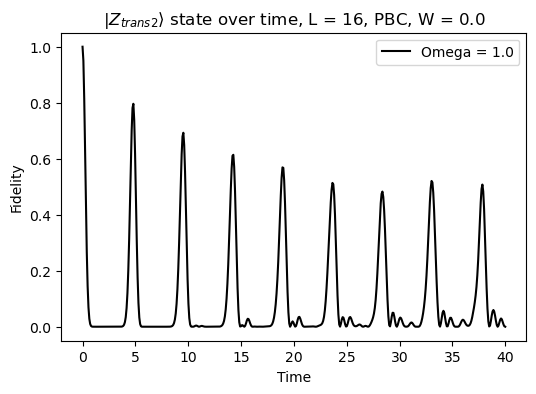

In [76]:
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelitiespureZ2, label='Omega = 1.0', color = 'black')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{trans2}\rangle$ state over time, L = 16, PBC, W = 0.0')
plt.legend()

#Fidelities1 = W = 0.1, Omega = 1.4
#Fidelities2 = W = 0.1, Omega = 1.0
#Fidelities3 = W = 0.1, Omega = 0.5
#Fidelities4 = W = 0.1, Omega = 0.2
#Fidelities5 = W = 0.1, Omega = 0.1
#Fidelities6 = W = 0.1, Omega = 0.0

#Fidelities7 = W = 0.0, Omega = 1.0 
#Fidelities8 = W = 0.1, Omega = 1.0 
#Fidelities9 = W = 0.2, Omega = 1.0
#Fidelities10 = W = 0.3, Omega = 1.0

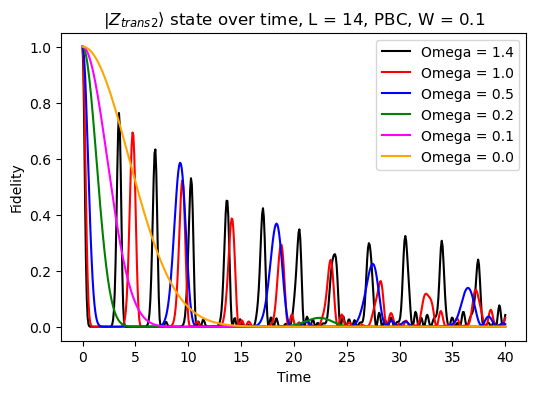

In [25]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities1, label='Omega = 1.4', color = 'black')
plt.plot(tlist, fidelities2, label='Omega = 1.0', color = 'red')
plt.plot(tlist, fidelities3, label='Omega = 0.5', color = 'blue')
plt.plot(tlist, fidelities4, label='Omega = 0.2', color = 'green')
plt.plot(tlist, fidelities5, label='Omega = 0.1', color = 'magenta')
plt.plot(tlist, fidelities6, label='Omega = 0.0', color = 'orange')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{trans2}\rangle$ state over time, L = 14, PBC, W = 0.1')
plt.legend()
plt.show()

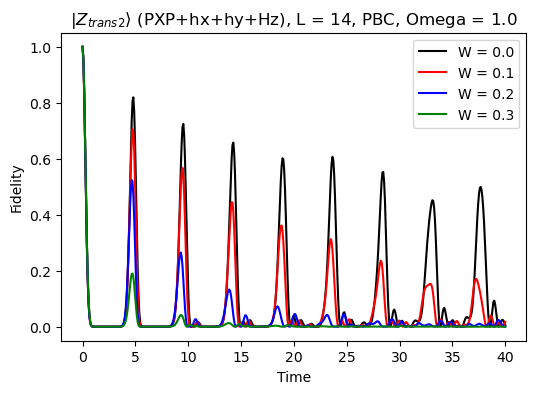

In [58]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities7, label='W = 0.0', color = 'black')
plt.plot(tlist, fidelities8, label='W = 0.1', color = 'red')
plt.plot(tlist, fidelities9, label='W = 0.2', color = 'blue')
plt.plot(tlist, fidelities10, label='W = 0.3', color = 'green')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{trans2}\rangle$ (PXP+hx+hy+Hz), L = 14, PBC, Omega = 1.0')
plt.legend()
plt.show()

WHat happens when we have perturbations from only the Z-direction?

In [49]:
def create_PXPHz_Hamiltonian(N, W, Bound, Omega):
    sx_list, sy_list, sz_list, p_list = generate_operators(N)

    H = 0
    for n in range(N - 2):
        H += Omega * p_list[n] * sx_list[n + 1] * p_list[n + 2]  # PXP model operators, scaled by Omega

    # Boundary conditions
    if Bound == 'pbc' or Bound == 'PBC':
        H += Omega * (p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1])  # PBC

    if Bound == 'obc' or Bound == 'OBC':
        H += Omega * (sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1])  # OBC

    # Random uniform distribution of perturbation strength values in the Z direction only
    # Add random Z-field perturbations to the Hamiltonian
    hw = np.random.uniform(-W / 2, W / 2, N)
    for n in range(N):
        H += hw[n] * sz_list[n]  # Perturbing only in the Z direction
    
    return H

Fidelity11 : Omega = 1.0 for all, W = 0.0, W = 0.1, W = 0.2, W = 0.3, W = 0.8

In [55]:
# Parameters
N = 14 # Number of sites
Omega = 1.0
W = 0.8
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)

H_PXP_Hz = create_PXPHz_Hamiltonian(N, W, Bound, Omega)

# Time evolution parameters
tlist = np.linspace(0, 40, 500)  # Time array, modify as needed

# Evolve the system
result = mesolve(H_PXP_Hz, translated_Z2_state(N), tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities15 = [np.abs(translated_Z2_state(N).overlap(state))**2 for state in result.states]

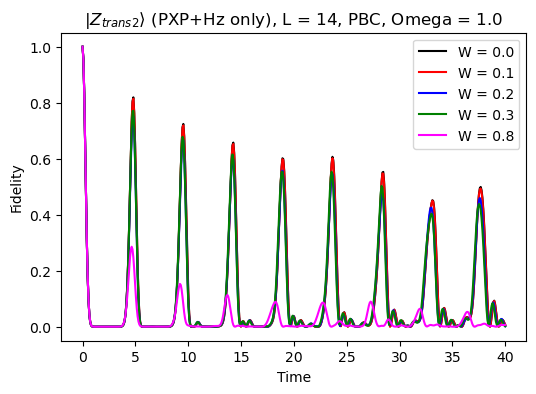

In [57]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities11, label='W = 0.0', color = 'black')
plt.plot(tlist, fidelities12, label='W = 0.1', color = 'red')
plt.plot(tlist, fidelities13, label='W = 0.2', color = 'blue')
plt.plot(tlist, fidelities14, label='W = 0.3', color = 'green')
plt.plot(tlist, fidelities15, label='W = 0.8', color = 'magenta')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{trans2}\rangle$ (PXP+Hz only), L = 14, PBC, Omega = 1.0')
plt.legend()
plt.show()

In [59]:
def U_x(H, T):
    return (-1j * H * T).expm()

def U_x_dagger(H, T):
    return (1j * H * T).expm()

In [78]:
def generate_operators(N):
    si = qeye(2)
    sx = sigmax()
    sz = sigmaz()
    p = (si - sz) / 2.0

    sx_list = []
    sz_list = []
    p_list = []

    for n in range(N):
        op_list = [si] * N

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

        op_list[n] = p
        p_list.append(tensor(op_list))

    return sx_list, sz_list, p_list

In [90]:
def create_PXP_Hamiltonian(N, Bound, Omega):
    sx_list, sz_list, p_list = generate_operators(N)

    H_static = 0
    for n in range(N - 2):
        H_static += Omega * p_list[n] * sx_list[n + 1] * p_list[n + 2]  # PXP model operators, scaled by Omega

    # Boundary conditions
    if Bound == 'pbc' or Bound == 'PBC':
        H_static += Omega * (p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1])  # PBC
    elif Bound == 'obc' or Bound == 'OBC':
        H_static += Omega * (sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1])  # OBC

    return H_static, sz_list

def H_drive(t, args):
    omega = args['omega']
    amplitude = args['amplitude']
    sz_list = args['sz_list']
    H = sum(np.cos(omega * t) * sz for sz in sz_list) * amplitude
    return H

# Define the Z2 state with excitation on every other site
def Z2_state(N):
    return tensor([basis(2, i % 2) for i in range(N)])

def plot_fidelity(N, Omega, Bound, amplitude, omega, T):
    initial_state = Z2_state(N)
    H_static, sz_list = create_PXP_Hamiltonian(N, Bound, Omega)
    args = {'omega': omega, 'amplitude': amplitude, 'sz_list': sz_list}
    
    # Time-dependent Hamiltonian component
    H_td = [[sz, lambda t, args: np.cos(omega * t) * amplitude] for sz in sz_list]
    
    # Evolve the system
    result = mesolve([H_static] + H_td, initial_state, T, [], [])
    
    # Calculate fidelity with the initial Z2 state
    fidelities = [np.abs(initial_state.overlap(state))**2 for state in result.states]
    
    # Plot the fidelity
    return fidelities

# Parameters
N = 16  # Number of qubits
Omega = 1.0  # PXP term control parameter
Bound = 'PBC'  # Boundary conditions
amplitude = 0.01  # Amplitude of the driving field
omega = 10  # Driving frequency, to be tuned to match the revival frequency
T = np.linspace(0, 40, 500)  # Time array, adjust as needed

# Plot the fidelity
fidelities = plot_fidelity(N, Omega, Bound, amplitude, omega, T)

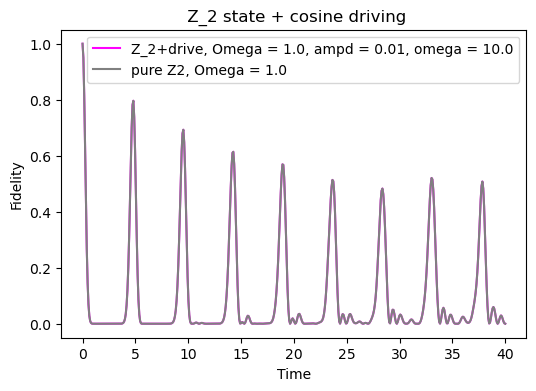

In [92]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(T, fidelities, label='Z_2+drive, Omega = 1.0, ampd = 0.01, omega = 10.0', color = 'magenta')
plt.plot(tlist, fidelitiespureZ2, label='pure Z2, Omega = 1.0', color = 'grey')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(' Z_2 state + cosine driving')
plt.legend()
plt.show()

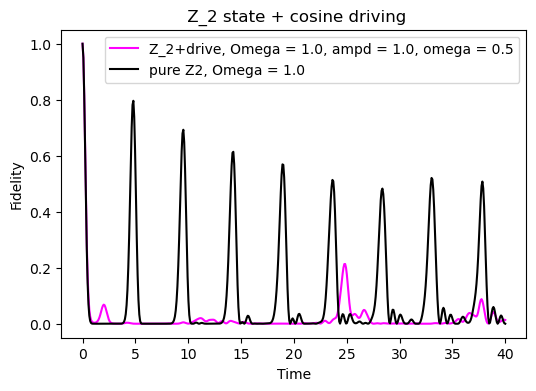

In [88]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(T, fidelities, label='Z_2+drive, Omega = 1.0, ampd = 1.0, omega = 0.5', color = 'magenta')
plt.plot(tlist, fidelitiespureZ2, label='pure Z2, Omega = 1.0', color = 'black')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(' Z_2 state + cosine driving')
plt.legend()
plt.show()

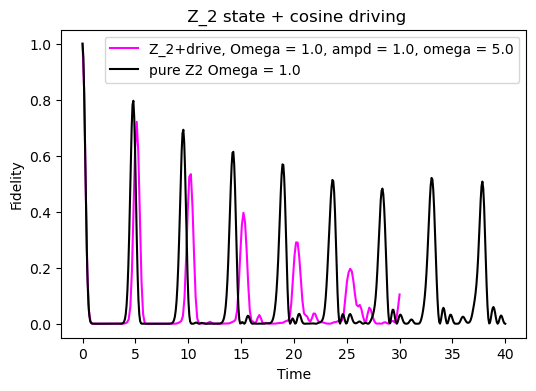

In [86]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(T, fidelities, label='Z_2+drive, Omega = 1.0, ampd = 1.0, omega = 5.0', color = 'magenta')
plt.plot(tlist, fidelitiespureZ2, label='pure Z2 Omega = 1.0', color = 'black')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(' Z_2 state + cosine driving')
plt.legend()
plt.show()

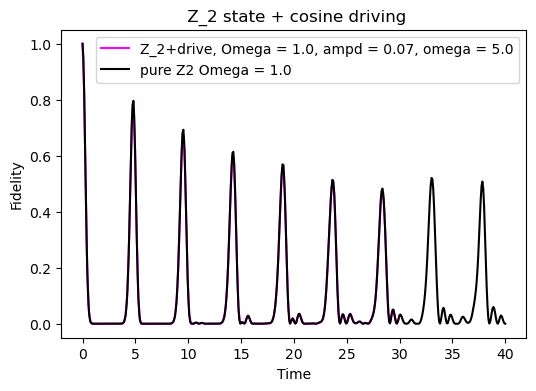

In [84]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(T, fidelities, label='Z_2+drive, Omega = 1.0, ampd = 0.07, omega = 5.0', color = 'magenta')
plt.plot(tlist, fidelitiespureZ2, label='pure Z2 Omega = 1.0', color = 'black')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(' Z_2 state + cosine driving')
plt.legend()
plt.show()